In [36]:
import pyspark as ps
from pyspark.sql.types import *
from pyspark.sql.functions import struct, col, when
from pyspark.sql.functions import lit
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16, 'font.family': 'sans'})
import numpy as np
import scipy.stats as stats

plt.style.use('ggplot')

In [90]:
def scatter_plt(ax, x, y, title, xlab, ylab, color, zorder=1):
    ax.scatter(x, y, alpha= 0.5, color=color, s=50, zorder=1)
    ax.set_title(title, fontsize=35)
    ax.set_ylabel(xlab, fontsize=20)
    ax.set_xlabel(ylab, fontsize=20)

In [3]:
def line_plt(ax, x, y, title, xlab, ylab, color, label):
    ax.plot(x, y, linewidth=2, color=color, label=label )


In [4]:
def drop_na_column(df, lst):
    return df.na.drop(subset=lst)

In [5]:
spark = (ps.sql.SparkSession.builder 
        .master("local[4]") 
        .appName("sparkSQL exercise") 
        .getOrCreate()
        )
sc = spark.sparkContext

In [6]:
df = spark.read.csv('data/dj_basin.csv',
                         header=True,       # use headers or not
                         quote='"',         # char for quotes
                         sep=",",           # char for separation
                         inferSchema=True)  # do we infer schema or not ?

In [7]:
df.printSchema()
print(df.count())

root
 |--   : string (nullable = true)
 |-- Formation: string (nullable = true)
 |-- SubFormation: string (nullable = true)
 |-- API: long (nullable = true)
 |-- TenDigitAPI: long (nullable = true)
 |-- WellName: string (nullable = true)
 |-- Operator: string (nullable = true)
 |-- HistoricOperator: string (nullable = true)
 |-- LeaseName: string (nullable = true)
 |-- County: string (nullable = true)
 |-- Section: integer (nullable = true)
 |-- Township: integer (nullable = true)
 |-- TownshipDirection: string (nullable = true)
 |-- Range: integer (nullable = true)
 |-- RangeDirection: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- OilGas: string (nullable = true)
 |-- IpTestDate: string (nullable = true)
 |-- IpOil: integer (nullable = true)
 |-- IpMCF: integer (nullable = true)
 |-- IpWtr: integer (nullable = true)
 |-- IpCondensate: integer (nullable = true)
 |-- IpWC: integer (null

In [8]:
df.createOrReplaceTempView("data")

niobrara_df = spark.sql("""
                    SELECT 
                        api,
                        state,
                        UPPER(formation) AS formation, 
                        Prod180DayOil AS day180,
                        Prod365DayOil AS day365,
                        Prod545DayOil AS day545,
                        Prod730DayOil AS day730,
                        Prod1095DayOil AS day1095,
                        Prod1460DayOil AS day1460,
                        Prod1825DayOil AS day1825,
                        TotalProppant
                    FROM data
                    WHERE state = "COLORADO" AND formation = 'NIOBRARA'
                    ORDER BY day180 DESC
                    """)
niobrara_df = niobrara_df.where(col("TotalProppant").isNotNull())
niobrara_df.show()

+-------------+--------+---------+------+------+------+------+-------+-------+-------+-------------+
|          api|   state|formation|day180|day365|day545|day730|day1095|day1460|day1825|TotalProppant|
+-------------+--------+---------+------+------+------+------+-------+-------+-------+-------------+
|5123445240000|COLORADO| NIOBRARA|170137|299194|364908|404653|   null|   null|   null|     29152250|
|5123421400000|COLORADO| NIOBRARA|168211|258083|302184|331733| 371447|   null|   null|     27496277|
|5123419900000|COLORADO| NIOBRARA|166440|276840|294349|295169| 296052|   null|   null|     23258909|
|5123469710000|COLORADO| NIOBRARA|163544|223855|  null|  null|   null|   null|   null|     19307299|
|5014207790000|COLORADO| NIOBRARA|162817|  null|  null|  null|   null|   null|   null|     15202030|
|5123419910100|COLORADO| NIOBRARA|162152|272722|324970|367584| 418096|   null|   null|     27444010|
|5123428910000|COLORADO| NIOBRARA|161401|230305|269258|295592|   null|   null|   null|     

In [9]:
day180_df = drop_na_column(niobrara_df,["day180"])
y_axis = list()
day = day180_df.rdd.map(lambda y: y.day180).collect()
well_180 = np.median(day)
y_axis.append(well_180)

day365_df = drop_na_column(niobrara_df,["day180", "day365"])
day = day365_df.rdd.map(lambda y: y.day365).collect()
well_365 = np.median(day)
y_axis.append(well_365)

day545_df = drop_na_column(niobrara_df, ["day180", "day365", "day545"])

day = day545_df.rdd.map(lambda y: y.day545).collect()
well_545 = np.median(day)
y_axis.append(well_545)

day730_df = drop_na_column(niobrara_df, ["day180", "day365", "day545", "day730"])

day = day730_df.rdd.map(lambda y: y.day730).collect()
well_730 = np.median(day)
y_axis.append(well_730)

day1095_df = drop_na_column(niobrara_df, ["day180", "day365", "day545", "day730", "day1095"])

day = day1095_df.rdd.map(lambda y: y.day1095).collect()
well_1095 = np.median(day)
y_axis.append(well_1095)

day1460_df = drop_na_column(niobrara_df, ["day180", "day365", "day545", 
                                          "day730", "day1095", "day1460"])

day = day1460_df.rdd.map(lambda y: y.day1460).collect()
well_1460 = np.median(day)
y_axis.append(well_1460)

day1825_df = drop_na_column(niobrara_df, ["day180", "day365", "day545", 
                                          "day730", "day1095", "day1460", "day1825"])

day = day1825_df.rdd.map(lambda y: y.day1825).collect()
well_1825 = np.median(day)
y_axis.append(well_1825)

In [10]:
codell_df = spark.sql("""
                    SELECT 
                        api,
                        state,
                        UPPER(formation) AS formation, 
                        Prod180DayOil AS day180,
                        Prod365DayOil AS day365,
                        Prod545DayOil AS day545,
                        Prod730DayOil AS day730,
                        Prod1095DayOil AS day1095,
                        Prod1460DayOil AS day1460,
                        Prod1825DayOil AS day1825,
                        TotalProppant
                    FROM data
                    WHERE state = "COLORADO" AND formation = 'CODELL'
                    ORDER BY day180 DESC
                    """)
codell_df = codell_df.where(col("TotalProppant").isNotNull())
codell_df.show()

+-------------+--------+---------+------+------+------+------+-------+-------+-------+-------------+
|          api|   state|formation|day180|day365|day545|day730|day1095|day1460|day1825|TotalProppant|
+-------------+--------+---------+------+------+------+------+-------+-------+-------+-------------+
|5123432500000|COLORADO|   CODELL|168677|292043|319381|356587| 434958|   null|   null|     19613850|
|5069064670000|COLORADO|   CODELL|167095|264374|326252|374903|   null|   null|   null|     20100410|
|5001103450000|COLORADO|   CODELL|156658|  null|  null|  null|   null|   null|   null|     14268046|
|5069064680000|COLORADO|   CODELL|154461|247601|294135|334573|   null|   null|   null|     20101350|
|5123444710000|COLORADO|   CODELL|148740|276703|352274|405327|   null|   null|   null|     29616188|
|5123477220000|COLORADO|   CODELL|147122|  null|  null|  null|   null|   null|   null|      5770100|
|5123449690000|COLORADO|   CODELL|142165|293085|415193|466572|   null|   null|   null|     

In [11]:
day180_df = drop_na_column(codell_df, ["day180"])
y_axis_c = list()
day = day180_df.rdd.map(lambda y: y.day180).collect()

well_180 = np.median(day)
y_axis_c.append(well_180)


day365_df = drop_na_column(codell_df, ["day180", "day365"])
day = day365_df.rdd.map(lambda y: y.day365).collect()

well_365 = np.median(day)
y_axis_c.append(well_365)

day545_df = drop_na_column(codell_df, ["day180", "day365", "day545"])
day = day545_df.rdd.map(lambda y: y.day545).collect()

well_545 = np.median(day)
y_axis_c.append(well_545)

day730_df = drop_na_column(codell_df, ["day180", "day365", "day545", "day730"])
day = day730_df.rdd.map(lambda y: y.day730).collect()

well_730 = np.median(day)
y_axis_c.append(well_730)

day1095_df = drop_na_column(codell_df, ["day180", "day365", "day545", "day730", "day1095"])
day = day1095_df.rdd.map(lambda y: y.day1095).collect()

well_1095 = np.median(day)
y_axis_c.append(well_1095)

day1460_df = drop_na_column(codell_df, ["day180", "day365", "day545", 
                                          "day730", "day1095", "day1460"])

day = day1460_df.rdd.map(lambda y: y.day1460).collect()

well_1460 = np.median(day)
y_axis_c.append(well_1460)


day1825_df = drop_na_column(codell_df, ["day180", "day365", "day545", 
                                          "day730", "day1095", "day1460", "day1825"])

day = day1825_df.rdd.map(lambda y: y.day1825).collect()
well_1825 = np.median(day)
y_axis_c.append(well_1825)

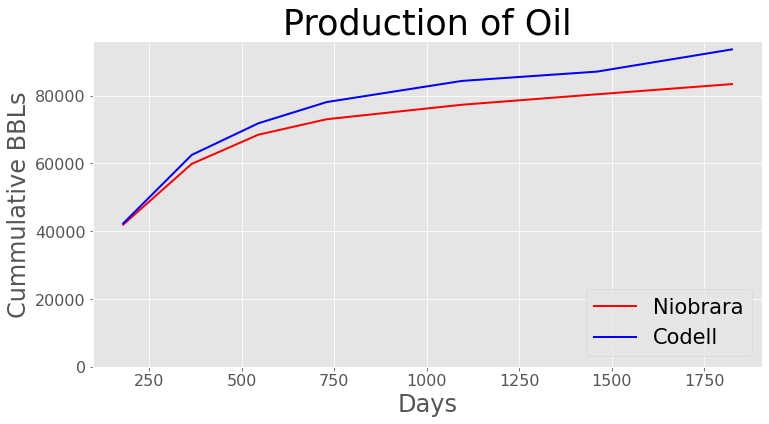

In [106]:
fig, ax = plt.subplots(figsize = (12, 6))
x_axis = [180, 365, 545, 730, 1095, 1460, 1825]

line_plt(ax, x_axis, y_axis, 'Produciton of Oil', 'Days', 'Cummulative BBLS', 'red', 'Niobrara')
line_plt(ax, x_axis, y_axis_c, 'Produciton of Oil', 'Days', 'Cummulative BBLS', 'blue', 'Codell')

ax.set_title('Production of Oil', fontsize=35)
ax.set_xlabel('Days', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_ylabel('Cummulative BBLs', fontsize=24)
ax.legend(loc='lower right', fontsize=21)
ax.set_ylim(0)

# plt.show()
plt.savefig('images/production_formation_proppant.png')

In [14]:
coorid_df = spark.sql("""
                    SELECT 
                        api,
                        State,
                        Latitude, 
                        Longitude
                    FROM data
                    WHERE State = 'COLORADO'
                    """)
coorid_df.show()

+-------------+--------+----------+------------+
|          api|   State|  Latitude|   Longitude|
+-------------+--------+----------+------------+
|5069064360000|COLORADO|40.8395791|-105.0018127|
|5087081610100|COLORADO|40.4234059|-104.1085912|
|5123306620000|COLORADO|40.7130352|-104.7683595|
|5123306860000|COLORADO| 40.337252|-104.7156774|
|5123309950100|COLORADO|40.6699689|-104.7509524|
|5123309960100|COLORADO|40.7490455|-104.8310469|
|5123312210000|COLORADO|40.9315953|-104.2791219|
|5123314470100|COLORADO|40.6968338|-104.7170118|
|5123323680000|COLORADO| 40.811546| -104.902546|
|5123324860100|COLORADO|40.5362909|-104.2767336|
|5123324870100|COLORADO|40.5691965|-104.2052552|
|5123324890100|COLORADO|40.5685238|-104.3192523|
|5123325010000|COLORADO|  40.94405| -104.367693|
|5123327460100|COLORADO|40.2214386|-104.6765437|
|5123328120000|COLORADO|40.6679018|-104.0932316|
|5123329100000|COLORADO|40.4927565|-104.3047292|
|5123329660000|COLORADO|  40.49591|-104.3245034|
|5123331000100|COLOR

In [107]:
coorid_df = coorid_df.na.replace({104.8865041: -104.8865041})
coorid_df = coorid_df.na.drop(subset=["Latitude", "Longitude"])

latitude = coorid_df.rdd.map(lambda y: y.Latitude).collect()
longitude = coorid_df.rdd.map(lambda x: x.Longitude).collect()

x_lat = np.array(latitude)
y_long = np.array(longitude)

BBox = ((min(y_long), max(y_long),      
         min(x_lat), max(x_lat)))

map_ = plt.imread('images/map_clear.png')


 ax.scatter(y_long, x_lat, zorder=1, alpha= 0.5, color='blue', s=10)
 ax.set_title('Colorado Well Locations', fontsize=35)
 ax.set_ylabel('Latitude', fontsize=20)
 ax.set_xlabel('Longitude', fontsize=20)

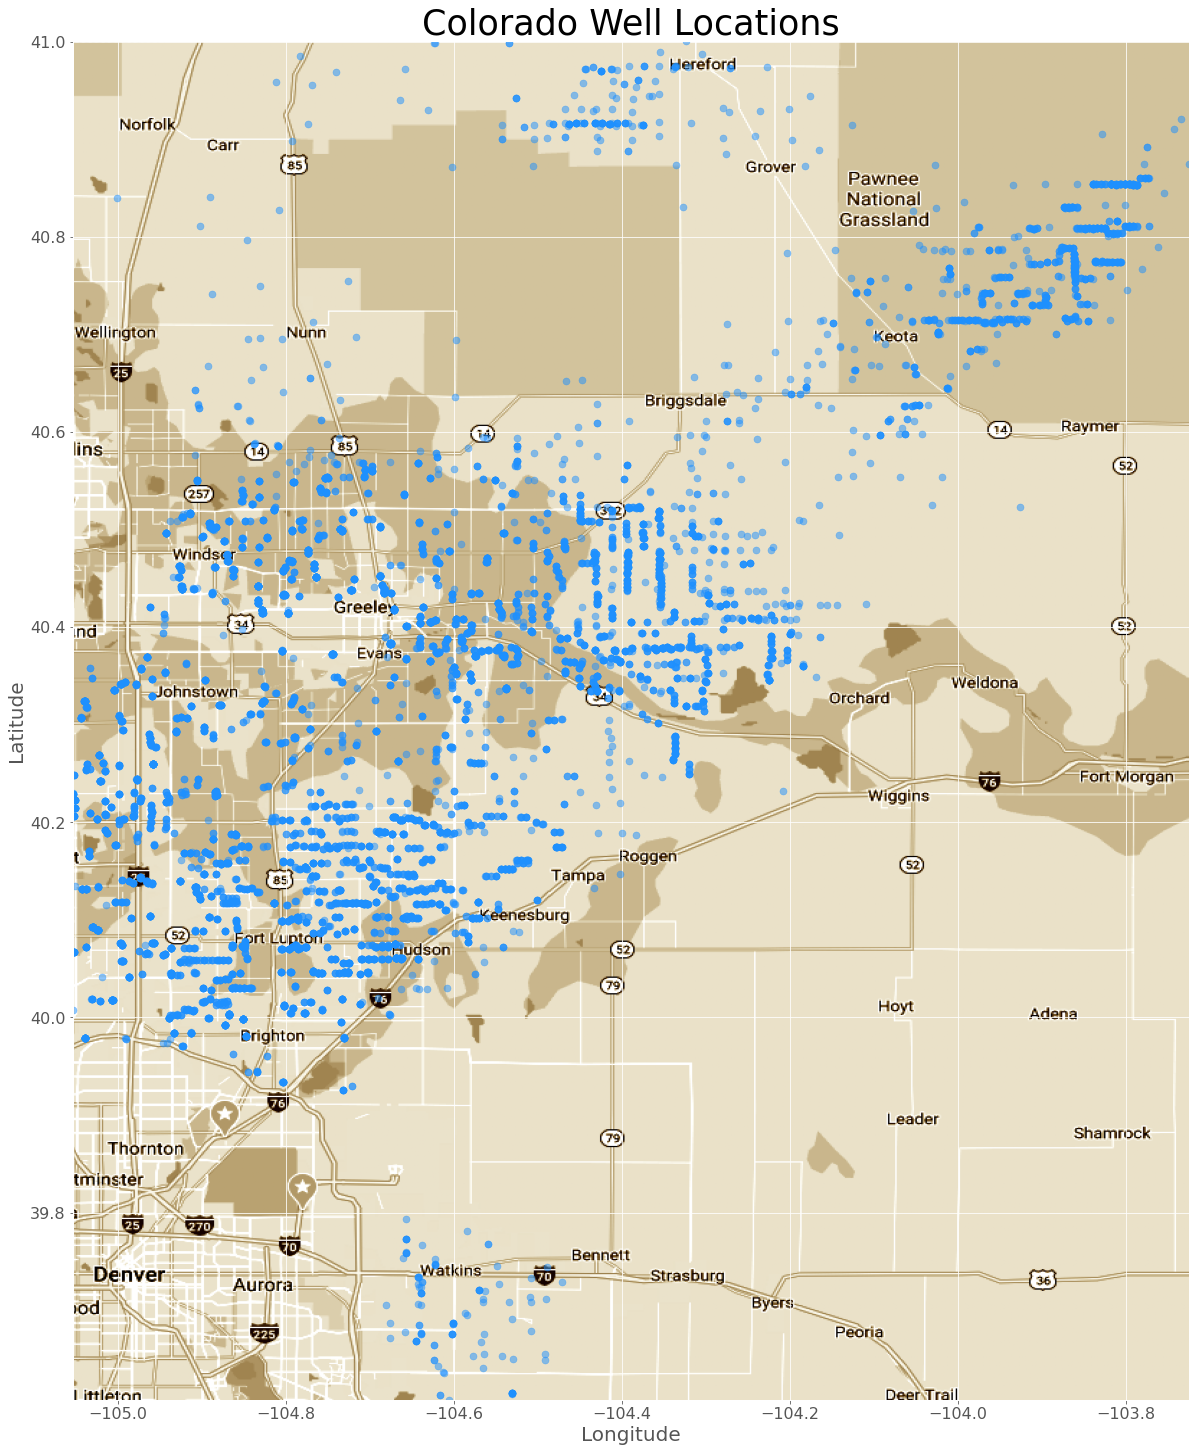

In [101]:
fig, ax = plt.subplots(figsize = (20, 25))

scatter_plt(ax, y_long, x_lat, 'Colorado Well Locations', 'Latitude', 'Longitude', 'dodgerblue', zorder=1)

ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map_, zorder=0, extent = BBox, aspect='auto')

# plt.show()
plt.savefig('images/well_location.png')

In [17]:
fluid_df = spark.sql("""
                    SELECT
                        api,
                        State,
                        TotalCleanVol,
                        FluidVol1,
                        UPPER(FluidType1) AS fluid_type1,
                        FluidVol2,
                        UPPER(FluidType2) AS fluid_type2,
                        FluidVol3,
                        UPPER(FluidType3) AS fluid_type3,
                        FluidVol4,
                        UPPER(FluidType4) AS fluid_type4,
                        FluidVol5,
                        UPPER(FluidType5) AS fluid_type5
                    FROM data
                    WHERE State = 'COLORADO'
                    """)
# fluid_df.show()
# print(fluid_df.count())

In [18]:
fluid_df = fluid_df.where(col("fluid_type1").isNotNull())
wrong_fluid = ['HYBRID|X-LINK', 'X-LINK', 'ACID|OTHER FLUID', 'OTHER FLUID|WATER', 
               'HYBRID|LINEAR GEL', 'HYBRID|SLICKWATER', 'X-LINK|SLICKWATER', 'ACID|X-LINK', 'GEL|LINEAR GEL']
right_fluid = ['HYBRID', 'GEL', 'ACID', 'WATER', 'HYBRID', 'HYBRID', 'HYBRID', 'HYBRID', 'GEL']
for i in range(1,6):
    fluid_df = fluid_df.na.replace(wrong_fluid, right_fluid, 'fluid_type'+str(i))

for i in range(1,6):
    fluid_df = fluid_df.na.fill({'fluid_type'+str(i): ''})
    fluid_df = fluid_df.na.fill({'FluidVol'+str(i): 0})
    
fluid_df = drop_na_column(fluid_df, ["TotalCleanVol"])
fluid_df = fluid_df.distinct()

     df = df.withColumn('hybrid_collect', lit(0))
     df = df.withColumn('hybrid1', when(col('fluid_type1') == 'HYBRID', col('FluidVol1')).otherwise(0))
     df = df.withColumn('hybrid_collect', col('hybrid_collect') + col('hybrid1'))

In [19]:
def clean_fluid_type(df, fluid_sys):
    fluid_vol = 'FluidVol'
    fluid_type = 'fluid_type'
    lowcase_fluid = fluid_sys.lower() + "_collect"
    
    df = df.withColumn(lowcase_fluid, lit(0))
    for i in range(1, 6):
        df = df.withColumn(fluid_sys.lower()+str(i), when(col(fluid_type+str(i)) == fluid_sys, col(fluid_vol+str(i))).otherwise(0))
        df = df.withColumn(lowcase_fluid, col(lowcase_fluid) + col(fluid_sys.lower()+str(i)))

    return df


In [20]:
fluid_df = clean_fluid_type(fluid_df, 'HYBRID')
# fluid_df.show()
fluid_df = clean_fluid_type(fluid_df, 'SLICKWATER')
# fluid_df.show()
fluid_df = clean_fluid_type(fluid_df, 'GEL')
# fluid_df.show()

columns_to_drop = ['hybrid1', 'hybrid2', 'hybrid3', 'hybrid4', 'hybrid5',
                   'slickwater1', 'slickwater2', 'slickwater3', 'slickwater4', 'slickwater5',
                   'gel1', 'gel2', 'gel3', 'gel4', 'gel5',
                   'FluidVol1', 'fluid_type1','FluidVol2','fluid_type2', 'FluidVol3', 
                   'fluid_type3', 'FluidVol4', 'fluid_type4', 'FluidVol5', 'fluid_type5']
fluid_df = fluid_df.drop(*columns_to_drop)

In [21]:
fluid_df.show(50)

+-------------+--------+-------------+--------------+------------------+-----------+
|          api|   State|TotalCleanVol|hybrid_collect|slickwater_collect|gel_collect|
+-------------+--------+-------------+--------------+------------------+-----------+
|5123450470000|COLORADO|        97227|             0|             91186|          0|
|5123320810100|COLORADO|        17045|             0|              2173|       9574|
|5123403830000|COLORADO|       146513|             0|             64588|          0|
|5123376830000|COLORADO|       102024|             0|            102024|          0|
|5123360060000|COLORADO|       184744|             0|            160288|      21992|
|5123377060000|COLORADO|        65210|             0|             65210|          0|
|5123377340000|COLORADO|        65892|             0|             22832|      43060|
|5123440840000|COLORADO|       127878|             0|             31866|      94333|
|5123453750000|COLORADO|       366038|             0|            

In [22]:
production_df = spark.sql("""
                    SELECT 
                        api,
                        State,
                        UPPER(formation) AS formation, 
                        Prod545DayOil AS day545
                    FROM data
                    WHERE state = "COLORADO"
                    """)
production_df.show()

+-------------+--------+---------+------+
|          api|   State|formation|day545|
+-------------+--------+---------+------+
|5069064360000|COLORADO| NIOBRARA|  7859|
|5087081610100|COLORADO| NIOBRARA| 22981|
|5123306620000|COLORADO|   CODELL|  9564|
|5123306860000|COLORADO| NIOBRARA| 52972|
|5123309950100|COLORADO|   CODELL|  7924|
|5123309960100|COLORADO|   CODELL|  3828|
|5123312210000|COLORADO| NIOBRARA| 16367|
|5123314470100|COLORADO| NIOBRARA| 10260|
|5123323680000|COLORADO| NIOBRARA| 36142|
|5123324860100|COLORADO| NIOBRARA|  4204|
|5123324870100|COLORADO| NIOBRARA|  5428|
|5123324890100|COLORADO| NIOBRARA|  7447|
|5123325010000|COLORADO| NIOBRARA| 30017|
|5123327460100|COLORADO| NIOBRARA| 24216|
|5123328120000|COLORADO| NIOBRARA| 54947|
|5123329100000|COLORADO| NIOBRARA| 17710|
|5123329660000|COLORADO| NIOBRARA| 37348|
|5123331000100|COLORADO| NIOBRARA| 75143|
|5123331100000|COLORADO| NIOBRARA| 11646|
|5123333230000|COLORADO| NIOBRARA| 54708|
+-------------+--------+---------+

In [23]:
compare_df = fluid_df.join(production_df, ['api'], 'left_outer')
compare_df = drop_na_column(compare_df, ['day545'])
columns_to_drop = ['State', 'TotalCleanVol', 'formation']
compare_df = compare_df.drop(*columns_to_drop)
compare_df.show()

+-------------+--------------+------------------+-----------+------+
|          api|hybrid_collect|slickwater_collect|gel_collect|day545|
+-------------+--------------+------------------+-----------+------+
|5123450470000|             0|             91186|          0| 52115|
|5123320810100|             0|              2173|       9574| 16390|
|5123403830000|             0|             64588|          0| 79842|
|5123376830000|             0|            102024|          0| 67039|
|5123360060000|             0|            160288|      21992|105605|
|5123377060000|             0|             65210|          0| 22896|
|5123377340000|             0|             22832|      43060| 19514|
|5123453750000|             0|            365236|          0|180770|
|5123372760000|             0|             42570|      36000| 54622|
|5123395340000|             0|             27530|      80388| 26421|
|5123381680000|             0|             20430|      23772| 68071|
|5123427300000|             0|    

In [24]:
compare_df.createOrReplaceTempView("design_data")
slick_production_df = spark.sql("""
                    SELECT
                        api,
                        slickwater_collect,
                        day545
                    FROM design_data
                    WHERE slickwater_collect > 0
                    ORDER BY day545 DESC
                    """)
print(slick_production_df.count())

4293


In [25]:
slick_fluid = slick_production_df.rdd.map(lambda x: x.slickwater_collect).collect()
slick_production = slick_production_df.rdd.map(lambda x: x.day545).collect()

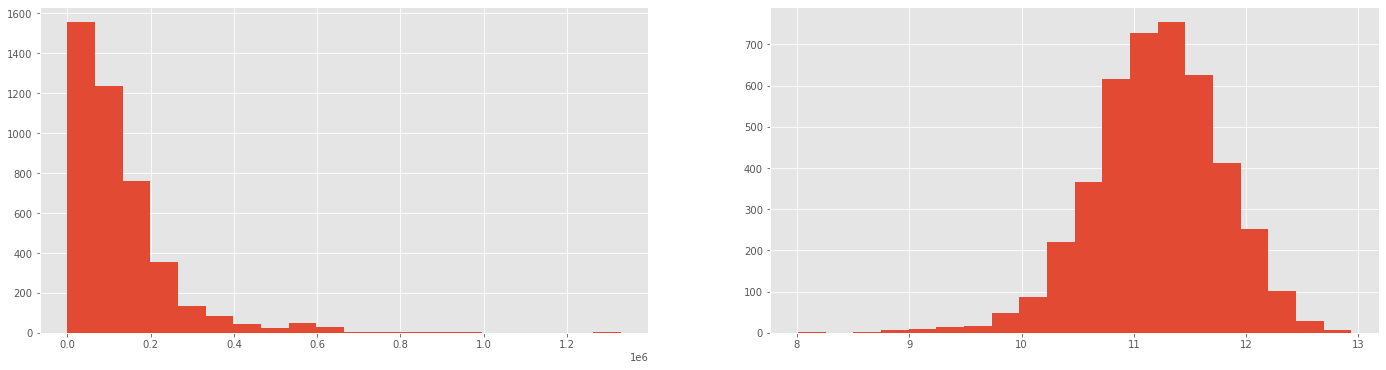

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (24, 6))

ax[0].hist(slick_fluid, bins=20, label='fluid')
ax[1].hist(np.log(slick_production), bins=20, label='oil produced');


In [27]:
gel_production_df = spark.sql("""
                    SELECT
                        api,
                        gel_collect,
                        day545
                    FROM design_data
                    WHERE gel_collect > 0
                    ORDER BY day545 DESC
                    """)
print(gel_production_df.count())

3059


In [28]:
gel_fluid = gel_production_df.rdd.map(lambda x: x.gel_collect).collect()
gel_production = gel_production_df.rdd.map(lambda x: x.day545).collect()

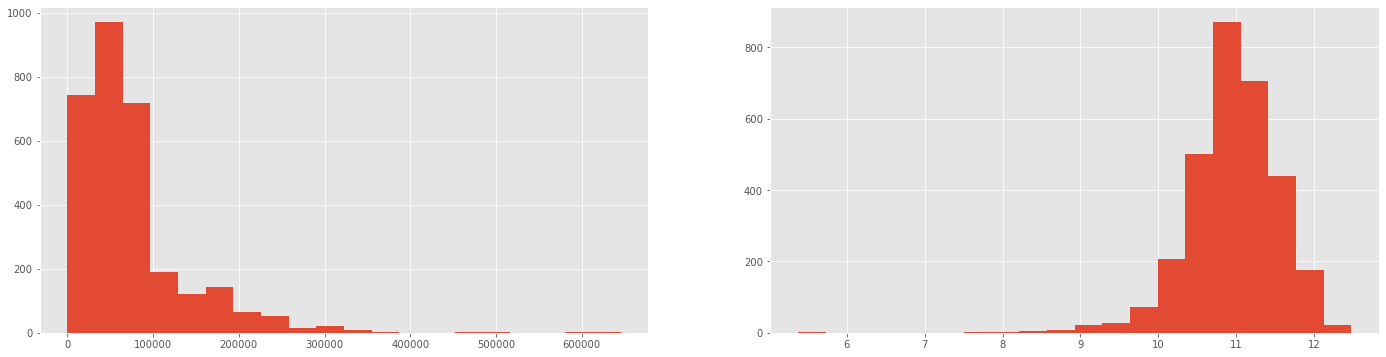

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (24, 6))

ax[0].hist(gel_fluid, bins=20, label='fluid')
ax[1].hist(np.log(gel_production), bins=20, label='oil produced');

In [30]:
hybrid_production_df = spark.sql("""
                    SELECT
                        api,
                        hybrid_collect,
                        day545
                    FROM design_data
                    WHERE hybrid_collect > 0
                    ORDER BY day545 DESC
                    """)
print(hybrid_production_df.count())

1167


In [31]:
hybrid_fluid = hybrid_production_df.rdd.map(lambda x: x.hybrid_collect).collect()
hybrid_production = hybrid_production_df.rdd.map(lambda x: x.day545).collect()

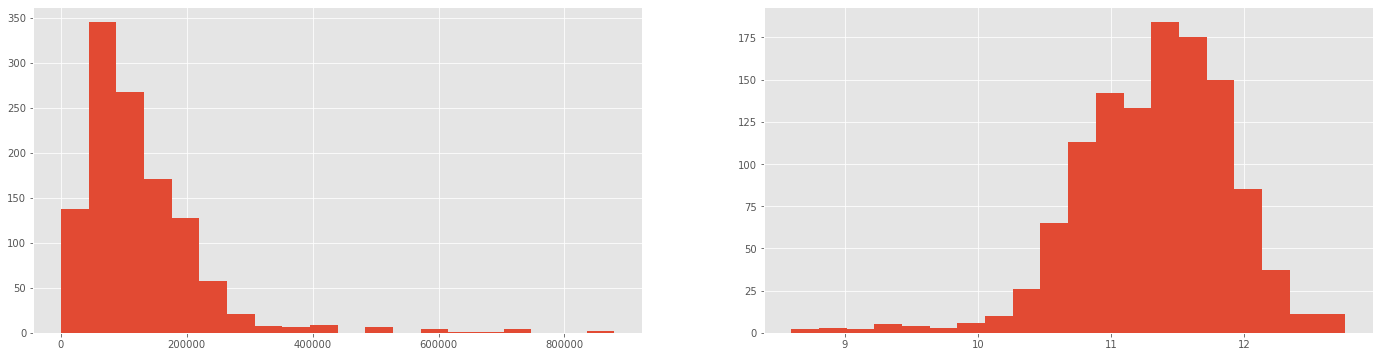

In [32]:
fig, ax = plt.subplots(1, 2, figsize = (24, 6))

ax[0].hist(hybrid_fluid, bins=20, label='fluid')
ax[1].hist(np.log(hybrid_production), bins=20, label='oil produced');

Ho: they produce the same.
Ha: they dont produce the same.

non parametric test - not assume distribution
mann-whitney u test (2 samples)
p-value: -prob under Ho the test stats, see more extreme
         -measure how likely the data smaple would be observed is the null hypothesis were true
         -probailbity of the data given the pre-specified assumption embedded in the statistical test.
         -AKA it's a "letter grade" for the Ho
markov chain
after 3

MANN-WHITNEY U TEST
-nonparametric equivalent of the two sample t-test
-makes no such assumption about the distribution
-The null hypothesis for the test is that the probability is 50% that a randomly drawn member of the first population 
 will exceed a member of the second population. An alternate null hypothesis is that the two samples come from the same population 
 (i.e. that they both have the same median).
 
-produce a U Statistic. 

-bonferoni correction for doing 3 tests


In [ ]:
# def count_winning_pairs(sample_1, sample_2):
#     sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
#     n_total_wins = 0
#     for x in sample_1:
#         n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
#         n_total_wins += n_wins
#     return n_total_wins

In [ ]:
# res = stats.mannwhitneyu(nick_heights, matt_heights, alternative="greater")
# print("p-value for Nick > Matt: {:2.3f}".format(res.pvalue))

In [33]:
def winner_counter(arr1, arr2):
    arr1, arr2 = np.array(arr1), np.array(arr2)
    win_total = 0
    for x in arr1:
        small_win = np.sum(x > arr2) + 0.5*np.sum(x == arr2)
        win_total += small_win
    return win_total
        

In [34]:
slick_wins = winner_counter(slick_production, gel_production)
gel_wins = winner_counter(gel_production, slick_production)
print("Number of Slick Wins: {}".format(slick_wins))
print("Number of Gel Wins: {}".format(gel_wins))

Number of Slick Wins: 8154753.5
Number of Gel Wins: 4977533.5


In [58]:
res = stats.mannwhitneyu(slick_production, gel_production, alternative="two-sided")
print("p-value for Slick > Gel: {}".format(res.pvalue))

p-value for Slick > Gel: 3.5445683029759616e-70


In [44]:
slick_wins = winner_counter(slick_production, hybrid_production)
hybrid_wins = winner_counter(hybrid_production, slick_production)
print("Number of Slick Wins: {}".format(slick_wins))
print("Number of hybrid Wins: {}".format(hybrid_wins))

Number of Slick Wins: 2176643.0
Number of hybrid Wins: 2833288.0


In [56]:
res = stats.mannwhitneyu(slick_production, hybrid_production, alternative="two-sided")
print("p-value for Slick > Hybrid: {}".format(res.pvalue))

p-value for Slick > Hybrid: 6.15374670613759e-12


In [47]:
gel_wins = winner_counter(gel_production, hybrid_production)
hybrid_wins = winner_counter(hybrid_production, gel_production)
print("Number of Gel Wins: {}".format(gel_wins))
print("Number of Hybrid Wins: {}".format(hybrid_wins))

Number of Gel Wins: 1124037.5
Number of Hybrid Wins: 2445815.5


In [57]:
res = stats.mannwhitneyu(gel_production, hybrid_production, alternative="two-sided")
print("p-value for Gel > Hybrid: {}".format(res.pvalue))

p-value for Gel > Hybrid: 1.6082501404922976e-77


The **Bonferroni Correction** is a popular way to rectify the over testing issue.

Suppose we want to test a combined hypothesis as a threshold of $\alpha$.  The bonferroni correction procedure then tests each of the individual hypothesies at a threshold of

$$ \alpha_\text{Bonferroni} = \frac{\alpha}{\text{# of Hypothesies in Combined Hypothesis}} $$

In [104]:
alpha = .01
hypo_combine = 3

In [105]:
alpha_b = alpha/hypo_combine
alpha_b

0.0033333333333333335